In [2]:
import torch
from torch import nn

#!/usr/bin/env python3
 
##########################################################
# Copyright (c) Jesper Vang <jesper_vang@me.com>         #
# Created on 26 Jul 2021                                 #
# Version:	0.0.1                                        #
# What: ? 						                         #
##########################################################

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn import datasets
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import torch
from torch import nn

from pprint import pprint # use pprint() to pretty print


print("Pandas Version: {}".format(pd.__version__))
print("Numpy Version: {}".format(np.__version__))
print("Matplotlib Version: {}".format(matplotlib.__version__))
print("Scikit-learn Version: {}".format(sklearn.__version__))
print("Seaborn Version: {}".format(sns.__version__))
print("Tensorflow Version: {}".format(tf.__version__))
print("Torch Version: {}".format(torch.__version__))

np.set_printoptions(suppress=True, linewidth=130)


%matplotlib inline

plt.rcParams["figure.figsize"] = (10, 8)

# Where to save the figures
print(f'the current path is: {os.getcwd()}')
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

def tensor_to_image(data: torch.Tensor):
  img = plt.imshow(data.numpy())
  img.set_cmap('gray')
  plt.axis('on')
  plt.xticks([])
  plt.yticks([])  


Pandas Version: 1.3.0
Numpy Version: 1.19.5
Matplotlib Version: 3.4.2
Scikit-learn Version: 0.24.2
Seaborn Version: 0.11.1
Tensorflow Version: 2.5.0
Torch Version: 1.9.0
the current path is: /Users/jvang/Documents/Projects/Applied_AI_IT_Uni/day07


In [3]:
def conv2d(X, K):
    """Compute 2D cross-correlation."""
    h, w = K.shape
    Y = torch.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = (X[i:i + h, j:j + w] * K).sum()
    return Y

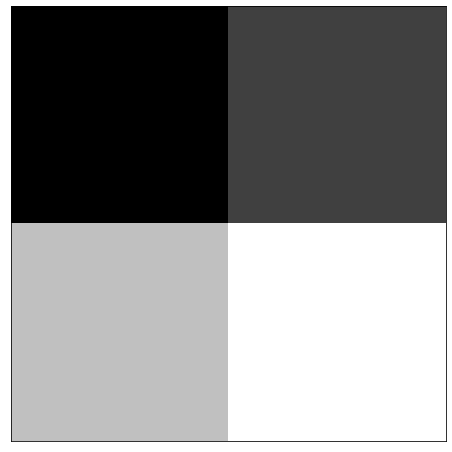

In [4]:
X = torch.tensor([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]])
K = torch.tensor([[0.0, 1.0], [2.0, 3.0]])
filtered = conv2d(X, K)

# plt.imshow(filtered.numpy(), cmap='gray')
tensor_to_image(filtered)

     0    1    2    3    4    5    6    7
0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0
1  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0
2  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0
3  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0
4  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0
5  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0
 shape -> torch.Size([6, 8])


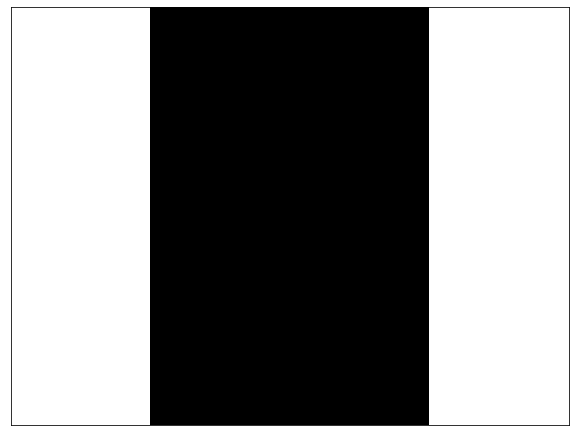

In [5]:
X = torch.ones((6, 8))
X[:, 2:6] = 0
tensor_to_image(X)
print(pd.DataFrame(X.numpy()))
print(f" shape -> {X.shape}")

     0    1
0  1.0 -1.0
1  1.0 -1.0
 shape -> torch.Size([2, 2])


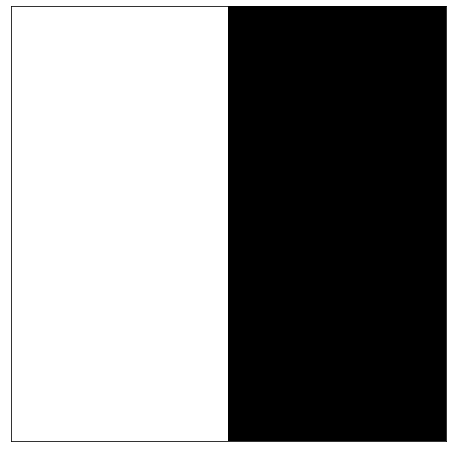

In [6]:
kernel = torch.tensor([[1.0, -1.0], [1.0, -1.0]])
tensor_to_image(kernel)
print(pd.DataFrame(kernel.numpy()))
print(f" shape -> {kernel.shape}")

     0    1    2    3    4    5    6
0  0.0  2.0  0.0  0.0  0.0 -2.0  0.0
1  0.0  2.0  0.0  0.0  0.0 -2.0  0.0
2  0.0  2.0  0.0  0.0  0.0 -2.0  0.0
3  0.0  2.0  0.0  0.0  0.0 -2.0  0.0
4  0.0  2.0  0.0  0.0  0.0 -2.0  0.0
 shape -> torch.Size([5, 7])


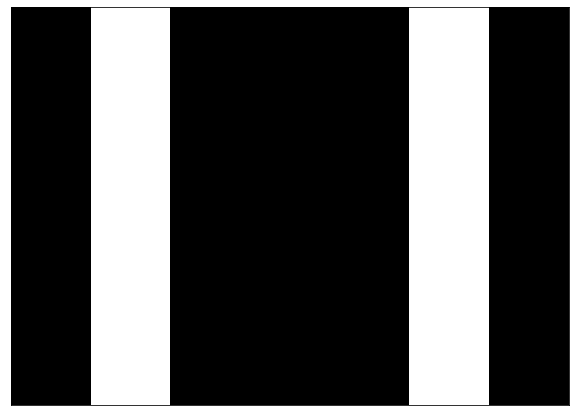

In [7]:
x_filtered = conv2d(X, kernel)
tensor_to_image(x_filtered.abs())
print(pd.DataFrame(x_filtered.numpy()))
print(f" shape -> {x_filtered.shape}")

 shape -> torch.Size([300, 400])


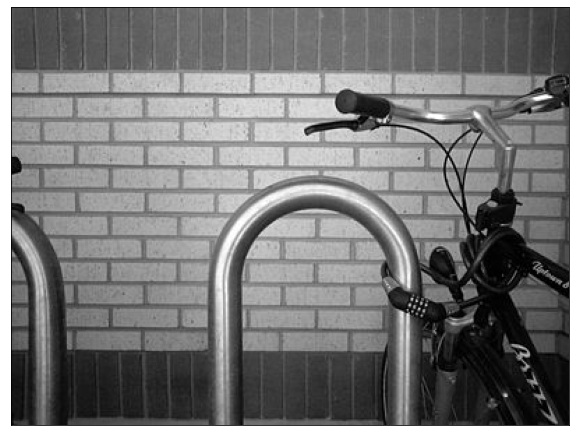

In [8]:
import urllib.request
from PIL import Image

urllib.request.urlretrieve(
  'https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Bikesgray.jpg/400px-Bikesgray.jpg',
   "bike.jpg")

im = np.array(Image.open('bike.jpg').convert('L'))
im_tens = torch.Tensor(im)
tensor_to_image(im_tens)
print(f" shape -> {im_tens.shape}")


### We that our vertical kernal and convolve it through the image format
### we that the horizontal kernal and convert it over the image

In [9]:
horizontal_res = conv2d(im_tens, kernel)
vertical_res = conv2d(im_tens, kernel.t())

shape -> torch.Size([299, 399])


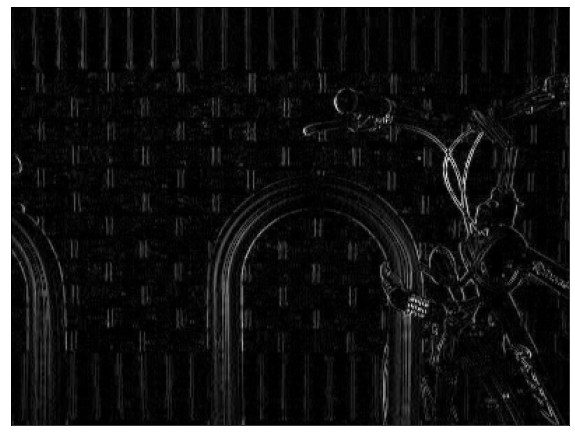

In [10]:
print(f"shape -> {vertical_res.shape}")
tensor_to_image(horizontal_res.abs())

shape -> torch.Size([299, 399])


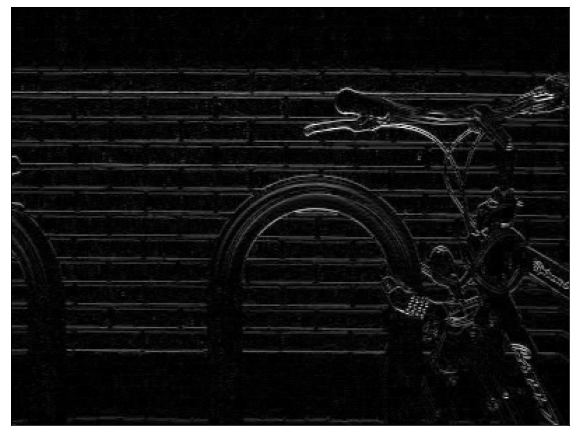

In [11]:
tensor_to_image(vertical_res.abs())
print(f"shape -> {vertical_res.shape}")

shape -> torch.Size([299, 399])


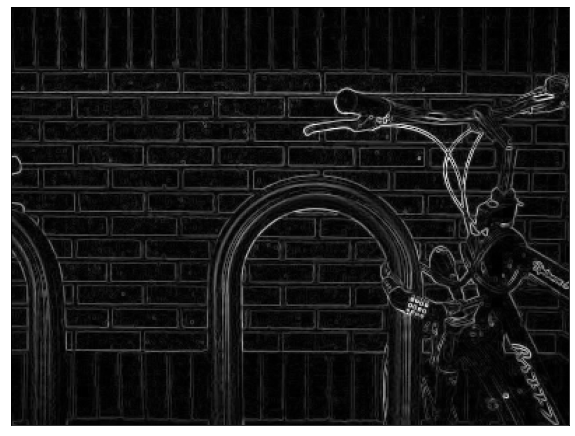

In [12]:
c = (horizontal_res ** 2 + vertical_res ** 2) ** 0.5
tensor_to_image(c)
print(f"shape -> {c.shape}")

In [13]:
sobel_hor = torch.Tensor([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_ver = sobel_hor.t()

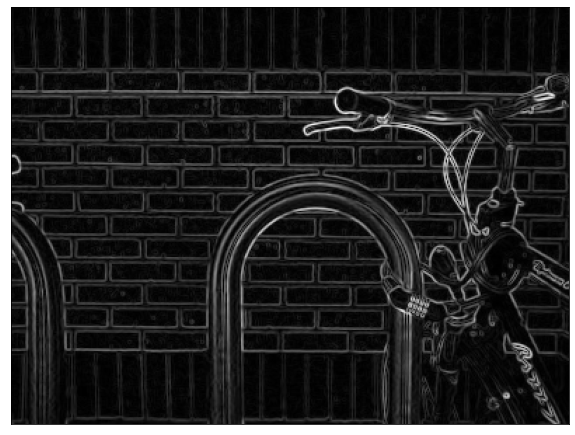

In [14]:
sob_engine_h = conv2d(im_tens, sobel_hor)
sob_engine_v = conv2d(im_tens, sobel_ver)

total_sobel_img = (sob_engine_h ** 2 + sob_engine_v ** 2) ** 0.5
tensor_to_image(total_sobel_img)

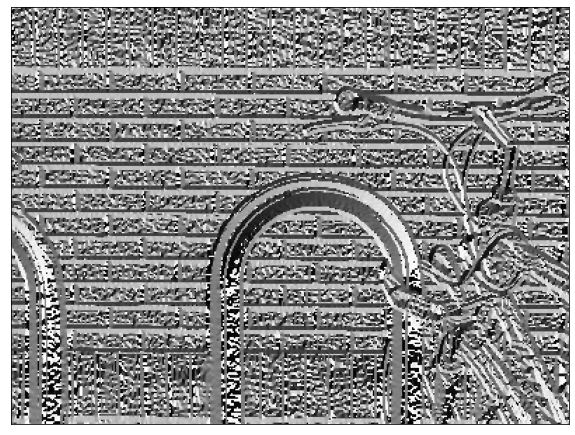

In [15]:
# Sobel operator gradient directions
total_sobel_grad = torch.atan2(sob_engine_v, sob_engine_h)
tensor_to_image(total_sobel_grad)

In [16]:
class Conv2D(nn.Module):
    def __init__(self, kernel_size):
        super().__init__()
        self.weight = nn.Parameter(torch.rand(kernel_size))
        self.bias = nn.Parameter(torch.zeros(1))

    def forward(self, x):
        return conv2d(x, self.weight) + self.bias

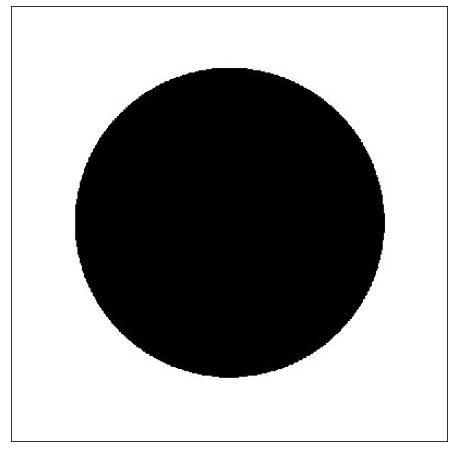

In [17]:
urllib.request.urlretrieve(
  'https://upload.wikimedia.org/wikipedia/commons/6/61/Black_Circle.jpg',
   "circle.jpg")

circle_im = torch.Tensor(np.array(Image.open('circle.jpg').convert('L')))
tensor_to_image(circle_im)



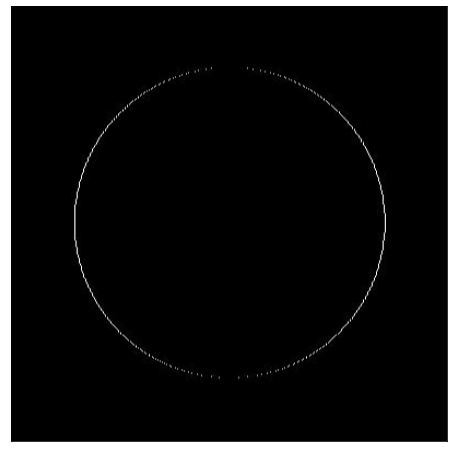

In [18]:
filtered_circle = conv2d(circle_im, kernel)
tensor_to_image(filtered_circle.abs())

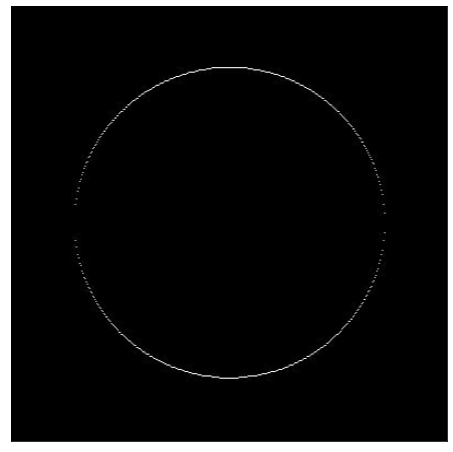

In [19]:
filtered_circle_t = conv2d(circle_im, kernel.t())
tensor_to_image(filtered_circle_t.abs())

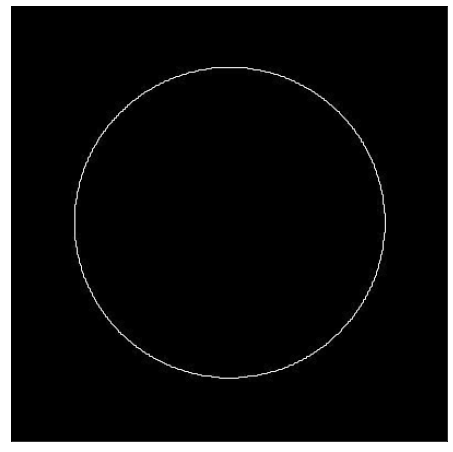

In [20]:
tensor_to_image((filtered_circle_t ** 2 + filtered_circle ** 2) ** 0.5)

In [21]:
conv_nn = Conv2D((2,2))
X = torch.ones((6, 8))
X[:, 2:6] = 0
Y = conv2d(X, kernel)

lr = 3e-2  # Learning rate

for i in range(300):
    Y_hat = conv_nn(X)
    l = (Y_hat - Y)**2
    conv_nn.zero_grad()
    l.mean().backward()
    # Update the kernel
    conv_nn.weight.data[:] -= lr * conv_nn.weight.grad
    if (i + 1) % 20 == 0:
        print(f'batch {i + 1}, loss {l.mean():.3f}')

batch 20, loss 0.530
batch 40, loss 0.231
batch 60, loss 0.115
batch 80, loss 0.057
batch 100, loss 0.029
batch 120, loss 0.014
batch 140, loss 0.007
batch 160, loss 0.004
batch 180, loss 0.002
batch 200, loss 0.001
batch 220, loss 0.000
batch 240, loss 0.000
batch 260, loss 0.000
batch 280, loss 0.000
batch 300, loss 0.000


In [22]:
conv_nn.weight

Parameter containing:
tensor([[ 0.7963, -1.3485],
        [ 1.1939, -0.6417]], requires_grad=True)

# Padding

In [23]:
from torch.nn import functional as F

shape -> torch.Size([399, 400])


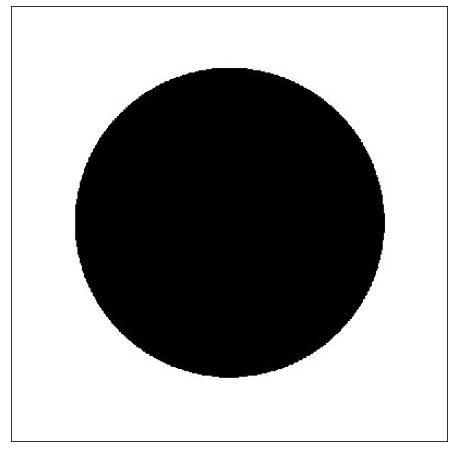

In [24]:
circle_im = torch.Tensor(np.array(Image.open('circle.jpg').convert('L')))
print(f"shape -> {circle_im.shape}")
tensor_to_image(circle_im)

shape -> torch.Size([401, 402])


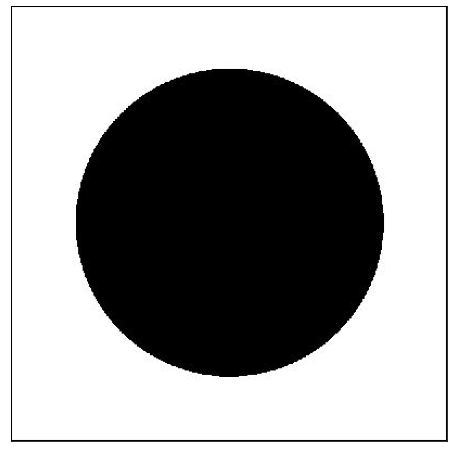

In [25]:
padded_circle_im = F.pad(circle_im, (1,1,1,1), value=1)
print(f"shape -> {padded_circle_im.shape}")
tensor_to_image(padded_circle_im)

shape -> torch.Size([399, 400])


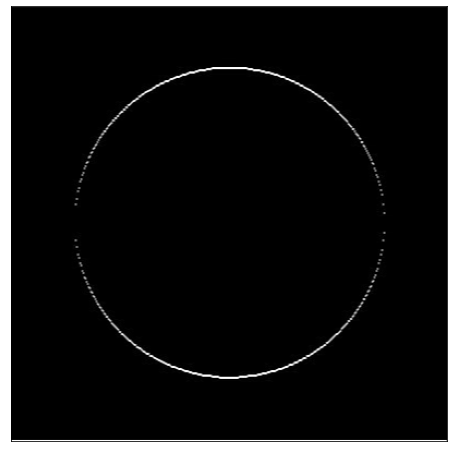

In [26]:
f_circle_im = conv2d(padded_circle_im, sobel_ver)
print(f"shape -> {f_circle_im.shape}")
tensor_to_image(f_circle_im.abs())

# Convolutional Neural Networks

## Import all libs

In [28]:
import numpy as np # to handle matrix and data operation
import pandas as pd # to read csv and handle dataframe

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data
from torch.autograd import Variable
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from torch import optim

from sklearn.model_selection import train_test_split

## Download MNIST

In [29]:
data = datasets.MNIST(
    root = 'data/mnist',
    train = True,                         
    transform = ToTensor(), 
    download = True,            
)
test_data = datasets.MNIST(
    root = 'data/mnist', 
    train = False, 
    transform = ToTensor()
)

9913344it [04:44, 34878.15it/s]


Extracting data/mnist/MNIST/raw/train-images-idx3-ubyte.gz to data/mnist/MNIST/raw



29696it [00:00, 334511.59it/s]           


Extracting data/mnist/MNIST/raw/train-labels-idx1-ubyte.gz to data/mnist/MNIST/raw



1649664it [00:41, 39468.10it/s]                             


Extracting data/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to data/mnist/MNIST/raw



5120it [00:00, 352086.90it/s]           

Extracting data/mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/mnist/MNIST/raw




/usr/local/anaconda3/envs/AI_ITU/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
len(test_data)

## Let's quickly inspect the data

In [ ]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(data), size=(1,)).item()
    img, label = data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## Let's split the data into training and validation like the last time

In [ ]:
train_set, val_set = torch.utils.data.random_split(data, [50000, 10000])

## Dataloader helps us sample a mini_batch
Mini-batches are a way to train an epoch on a smaller random sample of the training data to avoid overfitting and improve the performance with large datasets.

In [ ]:
from torch.utils.data import DataLoader

loaders = {
    'train' : torch.utils.data.DataLoader(train_set,
                                          batch_size=100, 
                                          shuffle=True, 
                                          num_workers=1),
    
    'validation'  : torch.utils.data.DataLoader(val_set, 
                                          batch_size=100,
                                          shuffle=True, 
                                          num_workers=1),
    'test'  : torch.utils.data.DataLoader(test_data, 
                                          batch_size=100,
                                          shuffle=True, 
                                          num_workers=1),
}
loaders

## Now it's time to design a Convolutional Neural Network

Parameters

**in_channels (int)** — Number of channels in the input image

**out_channels (int)** — Number of channels produced by the convolution

**kernel_size (int or tuple)** — Size of the convolving kernel

**stride (int or tuple, optional)** — Stride of the convolution. Default: 1

**padding (int or tuple, optional)** — Zero-padding added to both sides of the input. Default: 0

**padding_mode (string, optional)** — ‘zeros’, ‘reflect’, ‘replicate’ or ‘circular’. 
Default: ‘zeros’

**groups (int, optional)** — Number of blocked connections from input channels to output channels. Default: 1

**bias (bool, optional)** — If True, adds a learnable bias to the output. Default: True

In [ ]:
import torch.nn as nn
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         
            nn.Conv2d(
                in_channels=1,              
                out_channels=16,            
                kernel_size=5,              
                stride=1,                   
                padding=2,                  
            ),                              
            nn.ReLU(),                      
            nn.MaxPool2d(kernel_size=2),    
        )
        self.conv2 = nn.Sequential(      
            nn.Conv2d(16, 32, 5, 1, 2),     
            nn.ReLU(),                      
            nn.MaxPool2d(2),                
        )
        # fully connected layer, output 10 classes
        self.fully_connected = nn.Linear(32 * 7 * 7, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = x.view(x.size(0), -1)       
        output = self.fully_connected(x)
        return output    # return x for visualization

## We can get overall info on the network we just created

In [ ]:
conv_nn = CNN()
print(conv_nn)

## Loss function and optimizer

Now we define the loss function. We coose cross entropy since we want a categorical output.
We also choose an optimizer. Optimizer is the algorithm that changes the weights depending on the loss function gradient dependent on the NN parameters. We take Adam since it's better than SGD.

In [ ]:
loss_f = nn.CrossEntropyLoss()
optimizer = optim.Adam(conv_nn.parameters(), lr=0.01)


## Now we make a loop where we train the network

In [ ]:

def train(num_epochs, nn, loaders):
  min_valid_loss = np.inf
        
  if torch.cuda.is_available():
    nn.cuda()

  for epoch in range(num_epochs):

    # Train the model
    epoch_train_loss = 0
    # This line tells our NN that it's in the training mode
    # This will become relevant when we introduce layers that behave
    # differently in training and deployment/evaluation modes
    nn.train()
    for i, (images, labels) in enumerate(loaders['train']):
      nn.train
      if torch.cuda.is_available():
        images, labels = images.cuda(), labels.cuda()
      output = nn(images)              
      loss = loss_f(output, labels)
      epoch_train_loss += loss.item()
            
      # clear gradients for this training step   
      optimizer.zero_grad()           
            
      # backpropagation, compute gradients 
      loss.backward()    
      # apply gradients             
      optimizer.step()                
        
    # Validate the model
    epoch_val_loss = 0
    nn.eval()
    for images_v, labels_v in loaders['validation']:
      if torch.cuda.is_available():
        images_v, labels_v = images_v.cuda(), labels_v.cuda()
      output = nn(images_v)
      loss_v = loss_f(output, labels_v)
      epoch_val_loss += loss_v.item()

    print(f'Epoch {epoch+1}')
    print(f'Training Loss: {epoch_train_loss / len(loaders["train"])}')
    print(f'Validation Loss: {epoch_val_loss / len(loaders["validation"])}')
    print('-------------------')
    if min_valid_loss > epoch_val_loss:
      print(f'Validation Loss Decreased({min_valid_loss}--->{epoch_val_loss}) \t Saving The Model')
      min_valid_loss = epoch_val_loss
      # Saving State Dict
      torch.save(nn.state_dict(), 'saved_model.pth')

train(20, conv_nn, loaders)

In [ ]:
def evaluate(model, test_loader):
  if torch.cuda.is_available():
    model.cuda()
  model.eval()
  correct = 0 
  for test_imgs, test_labels in test_loader:
    if torch.cuda.is_available():
      test_imgs, test_labels = test_imgs.cuda(), test_labels.cuda()
    output = model(test_imgs)
    predicted = torch.max(output,1)[1]
    correct += (predicted == test_labels).sum()
  print("Test accuracy:{:.3f}% ".format( float(correct) / (len(test_loader)*100)))                           

In [ ]:
saved_nn = CNN()
saved_nn.load_state_dict(torch.load('saved_model.pth'))
evaluate(saved_nn, loaders['test'])